# Orbital Notebook
By: Kristin Aoki

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [3]:
r_0 = 147e9 * m

init = State(r = r_0,
             v = 0 * m / s)

,values
r,147000000000.0 meter
v,0.0 meter / second


In [4]:
r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e7 * s)

,values
init,r 147000000000.0 meter v 0.0 meter / s...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,10000000.0 second


In [5]:
def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    r, v = state
    unpack(system)
    
    force = G * m1 * m2 / r**2
    return force

In [6]:
universal_gravitation(init, system)

<Quantity(3.6686485997501037e+22, 'newton')>

In [7]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    y, v = state
    unpack(system)    

    force = universal_gravitation(state, system)
    dydt = v
    dvdt = -force / m2
    
    return dydt, dvdt

In [8]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>)

In [9]:
def event_func(state, t, system):
    r, v = state
    return r - system.r_final

In [10]:
event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [11]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[5432658.401694092]]
nfev,236
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [12]:
t_final = get_last_label(results) * s

<Quantity(5432658.401694092, 'second')>

In [13]:
t_final.to(UNITS.day)

<Quantity(62.877990760348276, 'day')>

In [14]:
ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)

In [15]:
results.index /= 60 * 60 * 24

In [16]:
r = results.r / 1e9;

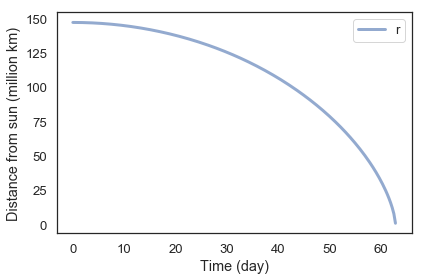

In [17]:
plot(r, label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

In [18]:
init = State(x = r_0,
             y = 0*m, 
             vx = 0*m*s, 
             vy = 30000*m*s)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter * second
vy,30000.0 meter * second


In [19]:
r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e8 * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,100000000.0 second


In [20]:
def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x,y,vx,vy = state
    unpack(system)
    
    r = Vector(x,y)
    force = G * m1 * m2 / r.mag**2
    direction = -r.hat()
    f_vector = direction*force
    
    return f_vector

In [21]:
universal_gravitation(init,system)

<Quantity([-3.6686486e+22 -0.0000000e+00], 'newton')>

In [22]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x,y,vx,vy = state
    unpack(system) 
    
    velocity = Vector(vx,vy)
    r = Vector (x,y)

    f_vector = universal_gravitation(state, system)
    acceleration = -G*m1/r.mag**2
    dxdt = vx
    dydt = vy
    dvxdt, dvydt = pol2cart(r.angle,acceleration)
    
    return dxdt, dydt, dvxdt, dvydt

In [23]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter * second')>,
 <Quantity(30000.0, 'meter * second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [24]:
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,278
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


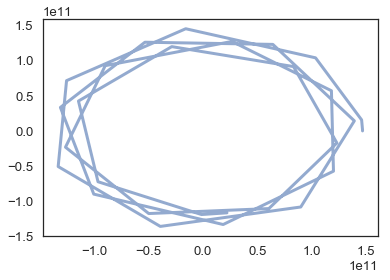

In [25]:
plot(results.x,results.y)